# **Unsupervised learning**



Heart Disease Data : https://archive.ics.uci.edu/dataset/45/heart+disease

# **Clustering Analysis of Heart Failure Data**

In this section, we will explore how different **clustering algorithms** can be applied to the **Heart Failure dataset** to uncover patterns and groupings within the data. Clustering is a type of **unsupervised learning** where we attempt to group similar data points together. It is particularly useful when we don't have labeled data but still want to identify inherent patterns in the dataset.

The dataset we will be using contains various **health features** of heart failure patients, such as age, blood pressure, and serum levels. Our goal is to apply different clustering techniques to see how they perform in grouping similar patients, which may reveal hidden patterns that can be useful for further medical analysis.

We will be using three popular clustering techniques:
- **K-Means Clustering**
- **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**
- **Hierarchical Clustering**


### Data Exploration

Before diving into clustering, it's important to **explore and understand** the dataset. We have done the following:

- **Previewed** the dataset and reviewed the summary statistics.
- Checked for **missing values**.
- Examined the **correlation** between features.
- Analyzed the **distribution** of each feature.

#### Questions:
- **What features are inclueded in the dataset?**
  - Do any features have unusual values or seem redundant?
- **Which features seem most important based on correlation?**

Use this information to guide your decisions during the clustering process.

In [11]:
!pip install ucimlrepo

Loading dataset...


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1



 Summary Statistics:


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000



 Missing Values:


,0
age,0
anaemia,0
creatinine_phosphokinase,0
diabetes,0
ejection_fraction,0
high_blood_pressure,0
platelets,0
serum_creatinine,0
serum_sodium,0
sex,0


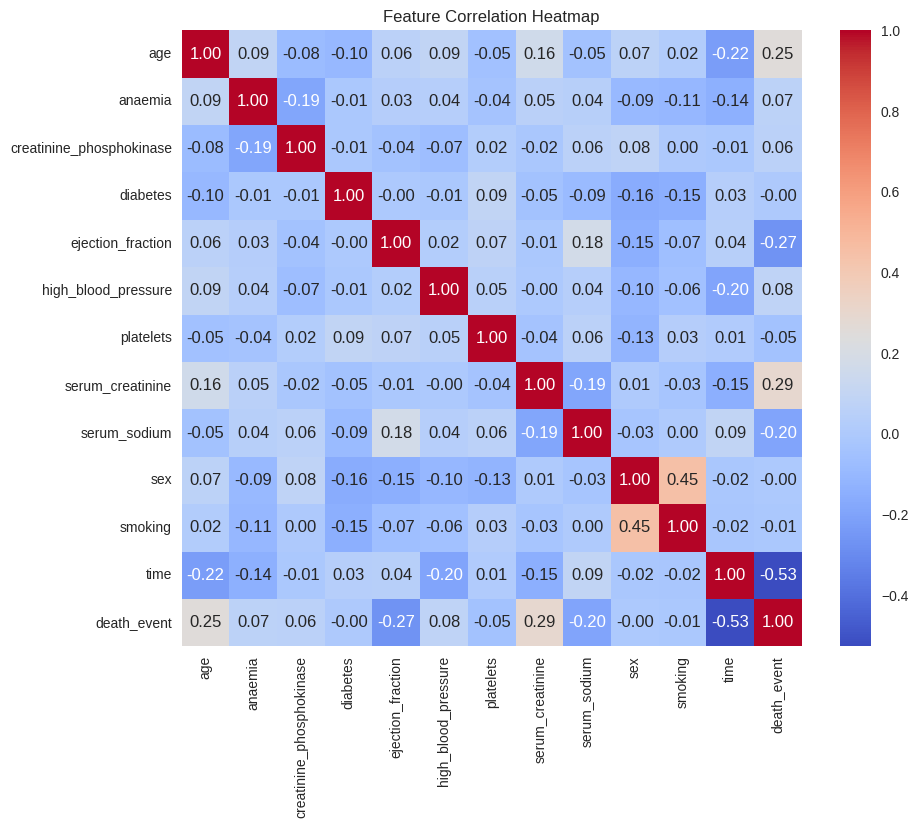


 Feature Distributions:


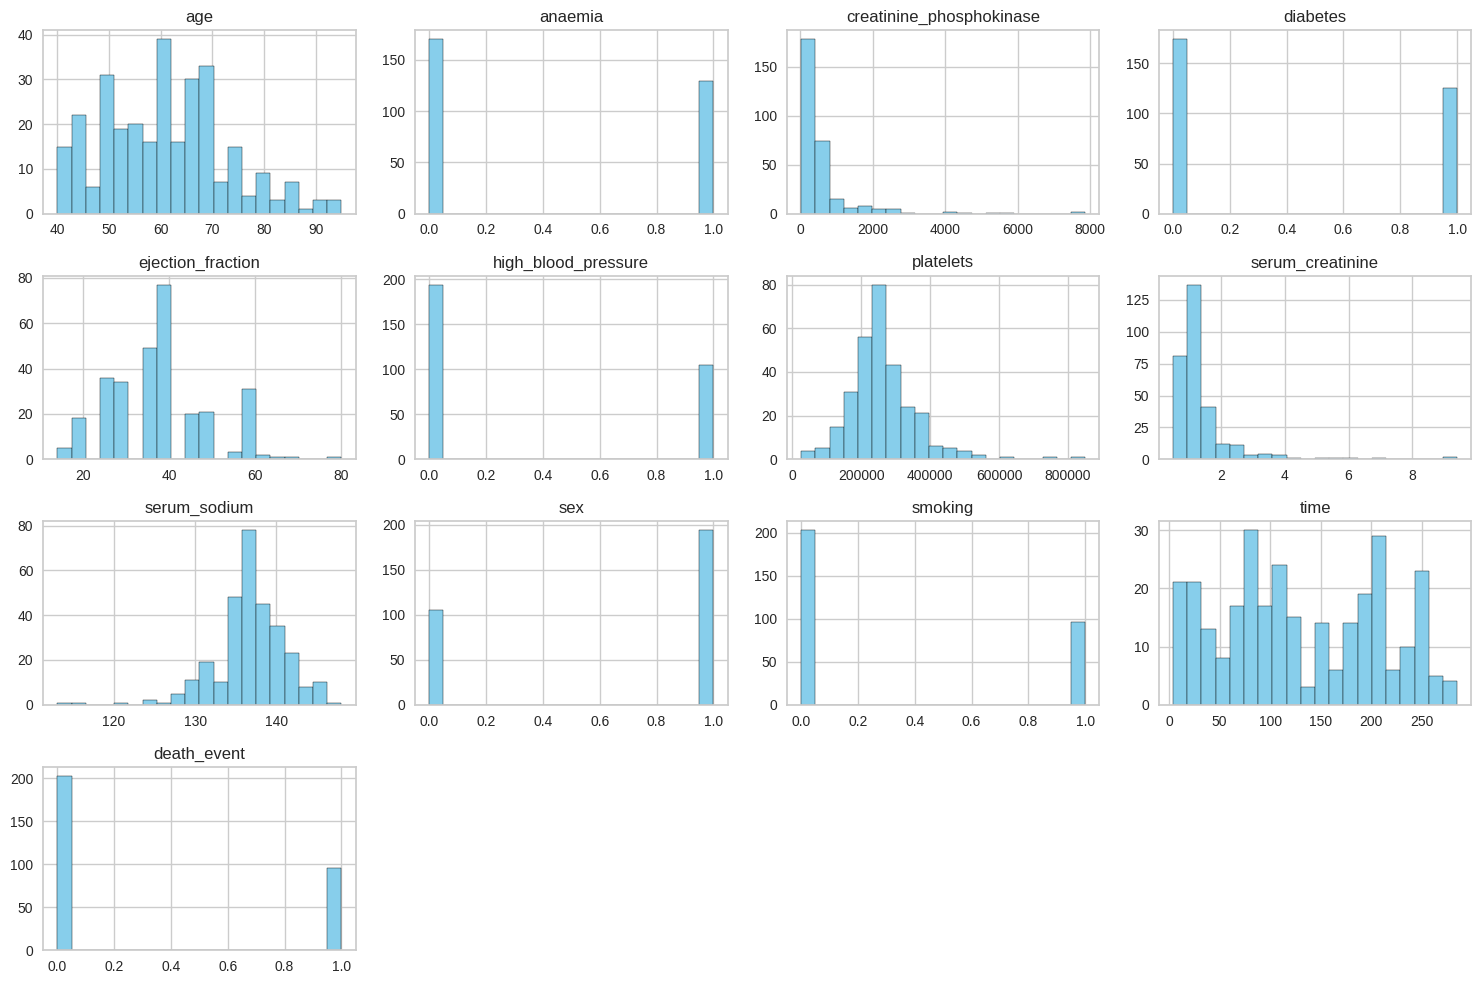

In [12]:
# ================================
# Import Libraries
# ================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from yellowbrick.cluster import KElbowVisualizer
import ipywidgets as widgets
from IPython.display import display, clear_output

# ================================
# Explore the Data
# ================================
print("Loading dataset...")
heart_data = fetch_ucirepo(id=519)
df = heart_data.data.original

# Preview
display(df.head())

# Summary
print("\n Summary Statistics:")
display(df.describe())

# Missing values
print("\n Missing Values:")
display(df.isnull().sum())

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# Distributions
numeric_cols = df.select_dtypes(include=np.number).columns
print("\n Feature Distributions:")
df[numeric_cols].hist(bins=20, figsize=(15, 10), color="skyblue", edgecolor="black")
plt.tight_layout()
plt.show()







In [13]:
# ================================
#  Preprocessing
# ================================
X = heart_data.data.features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)



### K-Means Clustering and DBSCAN

In this step, we will apply **K-Means** clustering to the data. First, we will use the **Elbow Method** to determine the optimal number of clusters (K).

After determining the optimal number of clusters, we will apply K-Means and visualize the results.

Next, we will explore **DBSCAN**, which is a density-based clustering algorithm. We will test different values of **eps** (epsilon) and **min_samples**.

**eps** : float, default=0.5
The maximum distance between two samples for one to be considered as in the neighborhood of the other. This is not a maximum bound on the distances of points within a cluster. This is the most important DBSCAN parameter to choose appropriately for your data set and distance function.

**min_sample** : sint, default=5
The number of samples (or total weight) in a neighborhood for a point to be considered as a core point. This includes the point itself. If min_samples is set to a higher value, DBSCAN will find denser clusters, whereas if it is set to a lower value, the found clusters will be more sparse.




Finding optimal K using Elbow Method...


/usr/local/lib/python3.11/dist-packages/yellowbrick/utils/kneed.py:156: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/usr/local/lib/python3.11/dist-packages/yellowbrick/cluster/elbow.py:374: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


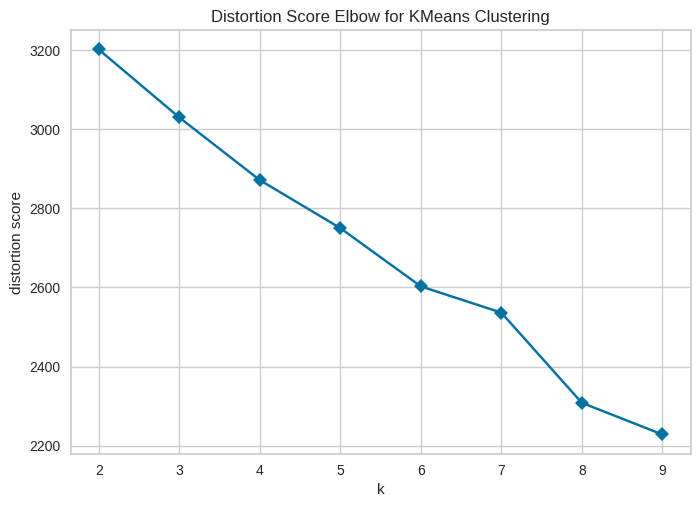


 Cluster Sizes:

K-Means:
0    128
1     85
2     86
Name: count, dtype: int64


In [14]:
# ================================
# K-Means with Elbow Method
# ================================
print("Finding optimal K using Elbow Method...")
kmeans_model = KMeans(random_state=42)
visualizer = KElbowVisualizer(kmeans_model, k=(2, 10), metric='distortion', timings=False)
visualizer.fit(X_scaled)
visualizer.show()

optimal_k = visualizer.elbow_value_ or 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)

print("\n Cluster Sizes:")
print("\nK-Means:")
print(pd.Series(kmeans_labels).value_counts().sort_index())
# The following line was causing the error as dbscan_labels is not defined here
# print("\nDBSCAN:")
# print(pd.Series(dbscan_labels).value_counts().sort_index())

In [15]:
# ================================
# Define Interactive Widgets
# ================================
k_slider = widgets.IntSlider(value=3, min=2, max=10, step=1, description='K (KMeans)')
eps_slider = widgets.FloatSlider(value=1.0, min=0.1, max=3.0, step=0.1, description='eps (DBSCAN)')
min_samples_slider = widgets.IntSlider(value=5, min=2, max=20, step=1, description='min_samples')

# ================================
# Define Plotting Function
# ================================
def update_plots(k, eps, min_samples):
    clear_output(wait=True)

    # K-Means
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans_labels = kmeans.fit_predict(X_scaled)
    kmeans_sil = silhouette_score(X_scaled, kmeans_labels)

    # DBSCAN
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    dbscan_labels = dbscan.fit_predict(X_scaled)
    dbscan_sil = silhouette_score(X_scaled, dbscan_labels) if len(set(dbscan_labels)) > 1 else -1

    # Plotting
    fig, axes = plt.subplots(1, 2, figsize=(18, 7))
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans_labels, palette='viridis', ax=axes[0], alpha=0.7)
    axes[0].set_title(f"K-Means (K={k}) | Silhouette: {kmeans_sil:.2f}")

    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=dbscan_labels, palette='coolwarm', ax=axes[1], alpha=0.7)
    axes[1].set_title(f"DBSCAN (eps={eps}, min_samples={min_samples}) | Silhouette: {dbscan_sil:.2f}")

    plt.suptitle(" Interactive Clustering Visualization", fontsize=16)
    plt.show()

    # Print cluster sizes
    print("K-Means Cluster Sizes:")
    print(pd.Series(kmeans_labels).value_counts().sort_index())

    print("\nDBSCAN Cluster Sizes:")
    print(pd.Series(dbscan_labels).value_counts().sort_index())

# ================================
# Bind widgets to function
# ================================
interactive_plot = widgets.interactive(update_plots,
                                       k=k_slider,
                                       eps=eps_slider,
                                       min_samples=min_samples_slider)

display(interactive_plot)

interactive(children=(IntSlider(value=3, description='K (KMeans)', max=10, min=2), FloatSlider(value=1.0, desc…

#### Questions:
- **What do the K-Means results look like in the PCA projection?**
  - Do the clusters look well-separated or overlapping?
- **How do the Silhouette Scores compare with the chosen K?**
  - Is the silhouette score high? What does that tell you about the quality of the clusters?

- **What do the DBSCAN clusters look like in the PCA projection?**
  - How do the DBSCAN clusters compare to K-Means? Are there more or fewer clusters?

- **How does the silhouette score of DBSCAN compare to K-Means?**
  - Does DBSCAN produce a higher or lower silhouette score than K-Means?
  - Is DBSCAN able to handle more complex shapes of clusters better than K-Means?

### Hierarchical Clustering

In this step, we will apply **Agglomerative Hierarchical Clustering** to the dataset. We will start by creating a **dendrogram** and then use an interactive slider to select the number of clusters.

In [16]:
# ================================
# Hierarchical Clustering
# ================================
print("\nPreparing hierarchical clustering...")

linked = linkage(X_scaled, method='ward')

def plot_hierarchical(n_clusters):
    clear_output(wait=True)
    display(cluster_slider)

    fig, axes = plt.subplots(1, 2, figsize=(18, 6))

    # Dendrogram
    dendrogram(linked, ax=axes[0], truncate_mode='lastp', p=30, leaf_rotation=90)
    axes[0].set_title("Hierarchical Clustering Dendrogram")
    axes[0].set_xlabel("Sample Index")
    axes[0].set_ylabel("Distance")

    # Agglomerative Clustering
    model = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    labels = model.fit_predict(X_scaled)
    sil_score = silhouette_score(X_scaled, labels)

    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels,
                    palette="Set2", edgecolor='k', alpha=0.7, ax=axes[1])
    axes[1].set_title(f"Clusters (n={n_clusters}) | Silhouette: {sil_score:.2f}")
    axes[1].set_xlabel("PCA 1")
    axes[1].set_ylabel("PCA 2")

    plt.tight_layout()
    plt.show()

    print("\n Cluster Sizes:")
    print(pd.Series(labels).value_counts().sort_index())

# Widget
cluster_slider = widgets.IntSlider(value=3, min=2, max=10, step=1, description='Clusters')
interactive_plot = widgets.interactive(plot_hierarchical, n_clusters=cluster_slider)
display(interactive_plot)



Preparing hierarchical clustering...


interactive(children=(IntSlider(value=3, description='Clusters', max=10, min=2), Output()), _dom_classes=('wid…

#### Questions:
- **How do the hierarchical clusters compare with K-Means and DBSCAN?**
  - Do you observe similar or different cluster structures?
  - How well does the hierarchical clustering algorithm fit the data compared to the other methods?
- **How does the silhouette score from hierarchical clustering compare to K-Means and DBSCAN?**
- **How does the number of clusters chosen in the slider impact the results?**
  - What happens when you adjust the number of clusters? How do the cluster sizes change?

## Final Thoughts

- **Which clustering algorithm worked best for this dataset?**  
  Evaluate based on metrics like silhouette score or visual separation of clusters.

- **How can you use these insights in a real-world scenario?**  




# **Clustering Analysis of Cancer data**

The dataset contains 19 attributes regarding cervix cancer behavior risk.

Cervical Cancer Behavior Risk Dataset: https://archive.ics.uci.edu/dataset/537/cervical+cancer+behavior+risk


Loading dataset...


,behavior_eating,behavior_personalHygiene,intention_aggregation,intention_commitment,attitude_consistency,attitude_spontaneity,norm_significantPerson,norm_fulfillment,perception_vulnerability,perception_severity,motivation_strength,motivation_willingness,socialSupport_emotionality,socialSupport_appreciation,socialSupport_instrumental,empowerment_knowledge,empowerment_abilities,empowerment_desires,behavior_sexualRisk
0,13,12,4,7,9,10,1,8,7,3,14,8,5,7,12,12,11,8,10
1,11,11,10,14,7,7,5,5,4,2,15,13,7,6,5,5,4,4,10
2,15,3,2,14,8,10,1,4,7,2,7,3,3,6,11,3,3,15,10
3,11,10,10,15,7,7,1,5,4,2,15,13,7,4,4,4,4,4,10
4,11,7,8,10,7,8,1,5,3,2,15,5,3,6,12,5,4,7,8



 Summary Statistics:


,behavior_eating,behavior_personalHygiene,intention_aggregation,intention_commitment,attitude_consistency,attitude_spontaneity,norm_significantPerson,norm_fulfillment,perception_vulnerability,perception_severity,motivation_strength,motivation_willingness,socialSupport_emotionality,socialSupport_appreciation,socialSupport_instrumental,empowerment_knowledge,empowerment_abilities,empowerment_desires,behavior_sexualRisk
count,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000
mean,12.791667,11.083333,7.902778,13.347222,7.180556,8.611111,3.125000,8.486111,8.513889,5.388889,12.652778,9.694444,8.097222,6.166667,10.375000,10.541667,9.319444,10.277778,9.666667
std,2.361293,3.033847,2.738148,2.374511,1.522844,1.515698,1.845722,4.907577,4.275686,3.400727,3.207209,4.130406,4.243171,2.897303,4.316485,4.366768,4.181874,4.482273,1.186782
min,3.000000,3.000000,2.000000,6.000000,2.000000,4.000000,1.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,2.000000
25%,11.000000,9.000000,6.000000,11.000000,6.000000,8.000000,1.000000,3.000000,5.000000,2.000000,11.000000,7.000000,3.000000,3.750000,6.750000,7.000000,5.000000,6.750000,10.000000
50%,13.000000,11.000000,10.000000,15.000000,7.000000,9.000000,3.000000,7.000000,8.000000,4.000000,14.000000,11.000000,9.000000,6.500000,12.000000,12.000000,10.000000,11.000000,10.000000
75%,15.000000,14.000000,10.000000,15.000000,8.000000,10.000000,5.000000,14.000000,13.000000,9.000000,15.000000,13.000000,11.250000,9.000000,14.250000,15.000000,13.000000,15.000000,10.000000
max,15.000000,15.000000,10.000000,15.000000,10.000000,10.000000,5.000000,15.000000,15.000000,10.000000,15.000000,15.000000,15.000000,10.000000,15.000000,15.000000,15.000000,15.000000,10.000000



 Missing Values:


,0
behavior_eating,0
behavior_personalHygiene,0
intention_aggregation,0
intention_commitment,0
attitude_consistency,0
attitude_spontaneity,0
norm_significantPerson,0
norm_fulfillment,0
perception_vulnerability,0
perception_severity,0


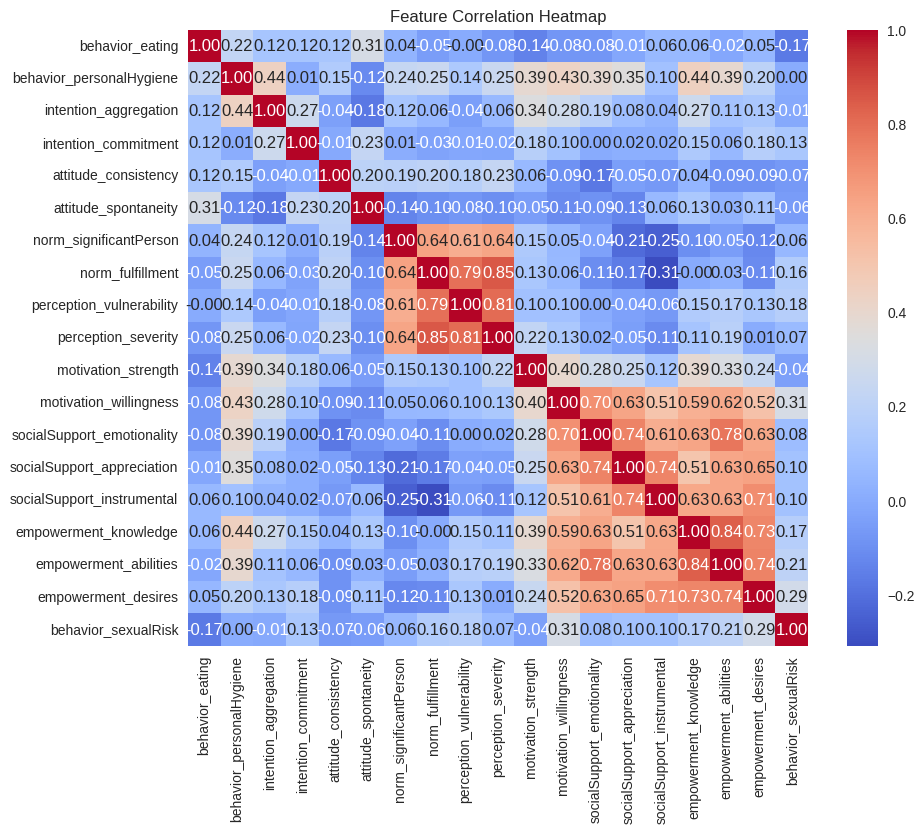


 Feature Distributions:


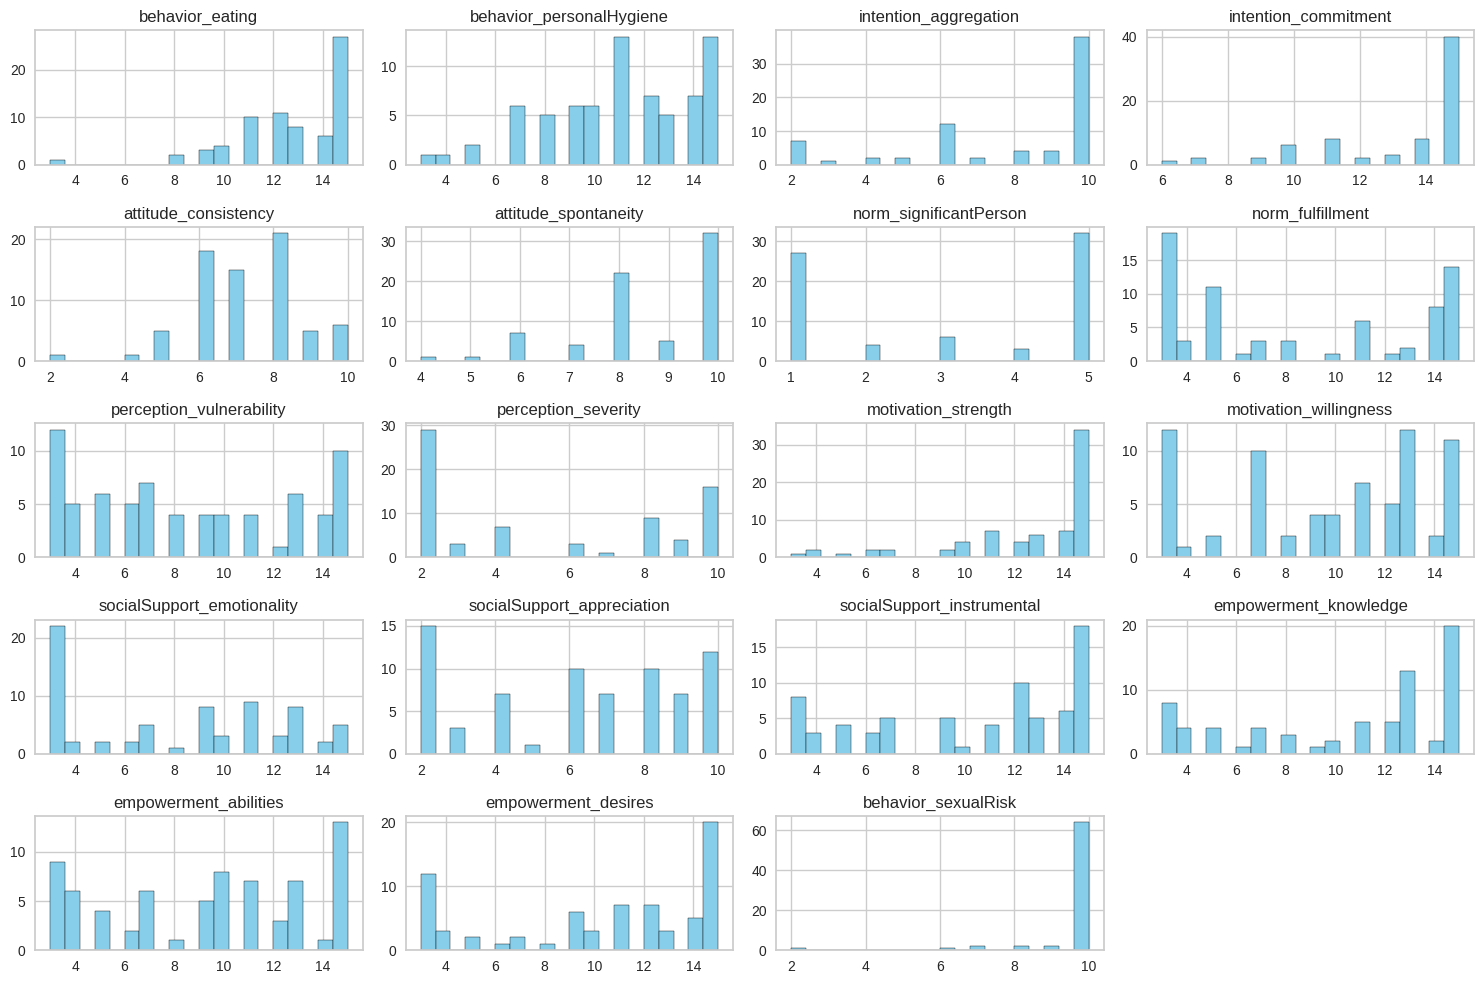

In [17]:
# ================================
# Explore the Data
# ================================
print("Loading dataset...")

# Fetch the dataset
cervical_cancer_behavior_risk = fetch_ucirepo(id=537)

# Extract features (X) and targets (y)
X = cervical_cancer_behavior_risk.data.features
y = cervical_cancer_behavior_risk.data.targets

# Convert features to a pandas DataFrame for easier manipulation
df = pd.DataFrame(X)

# Preview the dataset
display(df.head())

# Summary statistics for numerical columns
print("\n Summary Statistics:")
display(df.describe())

# Check for missing values
print("\n Missing Values:")
display(df.isnull().sum())

# Correlation heatmap (if numeric data is available)
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# Distribution of numerical features
numeric_cols = df.select_dtypes(include=np.number).columns
print("\n Feature Distributions:")
df[numeric_cols].hist(bins=20, figsize=(15, 10), color="skyblue", edgecolor="black")
plt.tight_layout()
plt.show()




### Now It is Your Turn to Play Around with Clustering!

Now that we have explored the dataset and visualized the features, it is time to get hands-on with some clustering.

### YOUR CODE: